
# Project: Investigate a Dataset - [Data science salaries]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The dataset was fetiched from kaggle at https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries 
The dataset contains information on Data science salaries across the globe 

It contains information on work year, experience level, employment type, job title, salary, salary currency, employee_residence, remote_ratio, company_location and company_size

The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director


### Question(s) for Analysis

> **q1** What Job title pays the most ?

> **q2** which region has the highest salaries for that job title ?

> **q3** does remote working affect the pay ?



In [2]:
# importing important libararies 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

### General Properties
our data set consist from 11 column and 565 entries

| Column | Description | 
| --- | --- | 
| work_year | 	The year the salary was paid. |
| experience_level | 	The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director |
| employment_type | The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance | 
| job_title | 	The role worked in during the year. |
| salary | 	The total gross salary amount paid. |
| salary_currency | 	The currency of the salary paid as an ISO 4217 currency code. |
| salaryinusd | 	The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com) |
| employee_residence | 	Employee's primary country of residence in during the work year as an ISO 3166 country code |
| remote_ratio | 	The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%) |
| company_size | The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large) | 
| company_location | 	The country of the employer's main office or contracting branch as an ISO 3166 country code. |



In [3]:
# Loading data 
ds_salaries = pd.read_csv('ds_salaries.csv')
ds_salaries.drop('Unnamed: 0',axis=1,inplace=True)
ds_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L



### Data Cleaning


In [66]:
ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary              565 non-null    int64 
 5   salary_currency     565 non-null    object
 6   salary_in_usd       565 non-null    int64 
 7   employee_residence  565 non-null    object
 8   remote_ratio        565 non-null    int64 
 9   company_location    565 non-null    object
 10  company_size        565 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.0+ KB


In [5]:
ds_salaries.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [64]:
ds_salaries.duplicated().sum()

42

In [65]:
ds_salaries.drop_duplicates(inplace=True)
ds_salaries.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [8]:
ds_salaries.employment_type.unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [9]:
ds_salaries.employee_residence.unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL',
       'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES',
       'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA',
       'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS',
       'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO',
       'IE', 'CH'], dtype=object)

In [10]:
ds_salaries.job_title.unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

So our data is clean now we can proceed to the visulization and let's explore our dataset

<a id='eda'></a>
## Explanatory Data Analysis


### What Job title pays the most ?


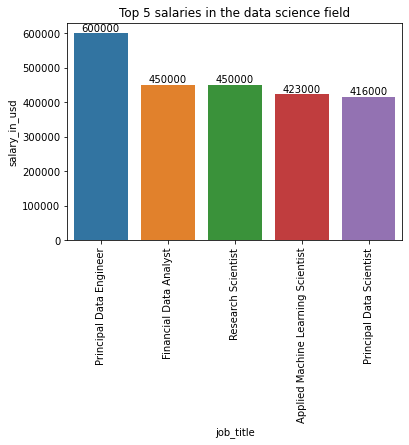

In [11]:
dataforplot = ds_salaries.sort_values('salary_in_usd',ascending=False).head()
ax=sns.barplot(data=dataforplot,x='job_title',y='salary_in_usd');
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90);
plt.title('Top 5 salaries in the data science field');

we can see that our top jop title in earning is Principal Data engineer with a salary thaat reaches 600K a year

###  Which region has the highest salaries for that job title ?

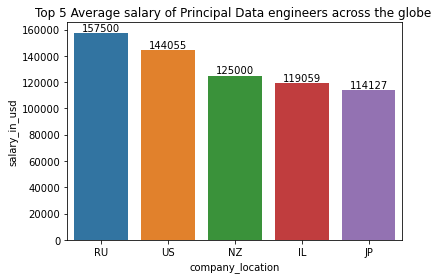

In [12]:
region = ds_salaries.groupby('company_location')['salary_in_usd'].mean()
region=region.sort_values(ascending=False).head()
minsize=region.min()
maxsize=region.max()
region=pd.DataFrame(region)
xa=sns.barplot(data=region,x=region.index,y='salary_in_usd')
xa.bar_label(xa.containers[0]);
plt.title('Top 5 Average salary of Principal Data engineers across the globe ');

So Principal Data engineers average salary in Russia is the highest while United states is in second and New Zealand in third place 

### Does remote working affect the pay ?

In [59]:
#split the dataset into two parts
remote_on = ds_salaries.query('remote_ratio > 0')
remote_off = ds_salaries.query('remote_ratio == 0')
plotdict = {'Avg_salary':{'remote_on':remote_on['salary_in_usd'].mean(),
                          'remote_off':remote_off['salary_in_usd'].mean()}}
plotdf = pd.DataFrame(data=plotdict)
plotdf=(plotdf.pct_change()).fillna(0)
plotdf['Avg_salary']=plotdf['Avg_salary']*100

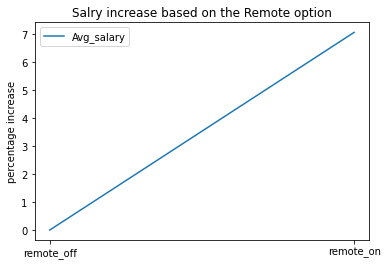

In [61]:
sns.lineplot(data=plotdf);
plt.ylabel('percentage increase');
plt.title('Salry increase based on the Remote option');

We can observe an increase up to 7 percent in the salaries of the jobs that has the remote option 

<a id='conclusions'></a>
## Conclusions

> Principal Data engineers get paid the most in the data science field followed by financial data analysts and research scientists

> The average salary of data engineers in Russia is the highest in the world, comes after it the US 

> The average salary in data science field is increased by 7% when hiring remotely 
